# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM (Out of Memory) errors by settings GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy images

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
image_exts

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
img = cv2.imread(os.path.join('data','happy', '154006829.jpg'))
img.shape

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 1.3 Load Data

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [160]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [161]:
data_iterator = data.as_numpy_iterator()

In [162]:
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0].shape

In [ ]:
#
batch[1]

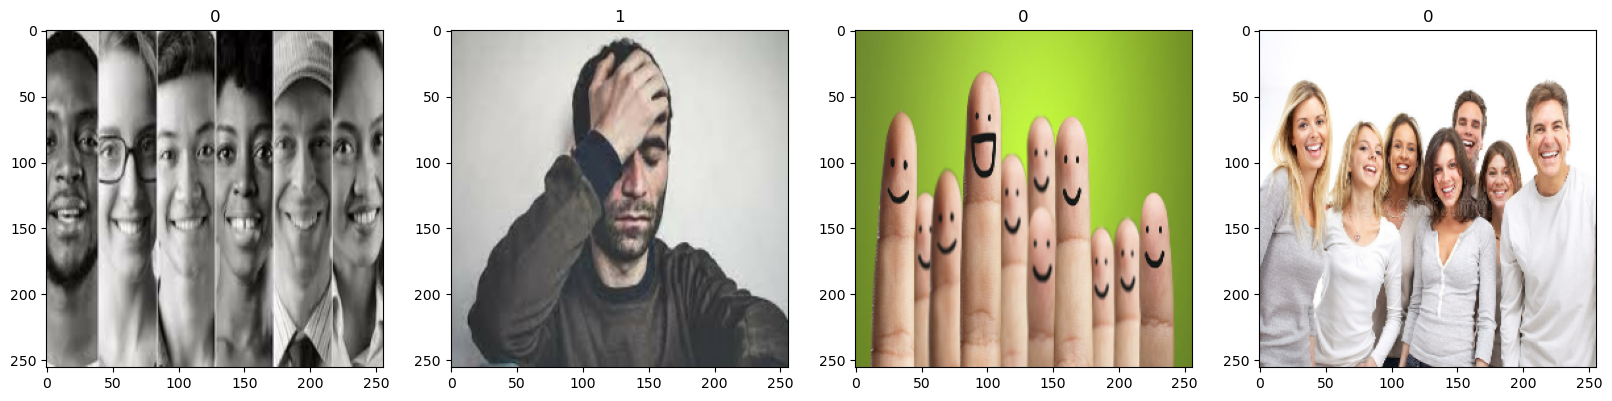

In [163]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0] / 255
scaled.max()

# 2. Preprocess Data

## 2.1 Scale Data

In [133]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [134]:
scaled_data.as_numpy_iterator().next()[0].max()

1.0

## 2.2 Split Data

In [ ]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1)

print("Sizes {} must be equal to batch size {}".format(val_size + test_size + train_size, len(data)))

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [151]:
model = Sequential()

In [152]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [165]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [166]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 16)      